# Visualizing Attention Weights

During training model learns to 'pay attention' on relevant parts of memory containing supporting facts for making a right inference. The code below visualizes activations of the attention layer.

In [4]:
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch
from torch.autograd import Variable

from data_utils import DialogReader
from model import MemN2N
from vocab import Vocab

from data_utils import vec2sent

%matplotlib inline

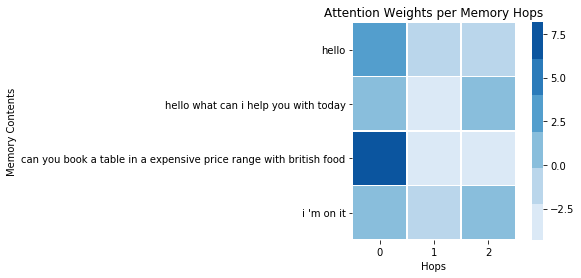

True label:  where should it be
Prediction:  where should it be

--------------------------------------------------



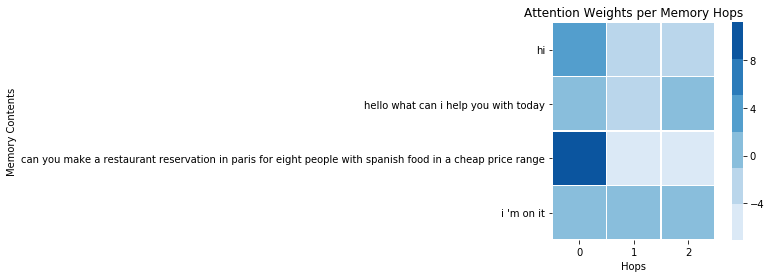

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



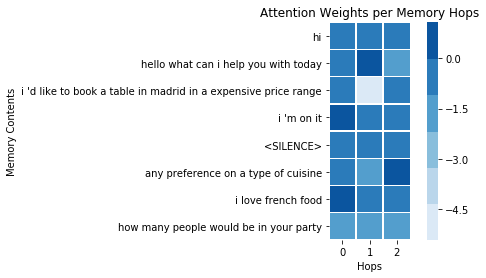

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



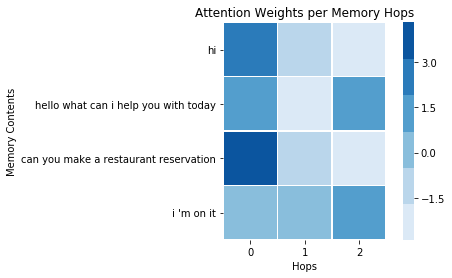

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



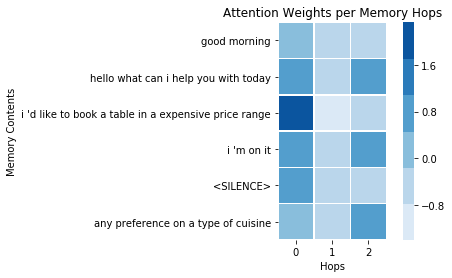

True label:  where should it be
Prediction:  where should it be

--------------------------------------------------



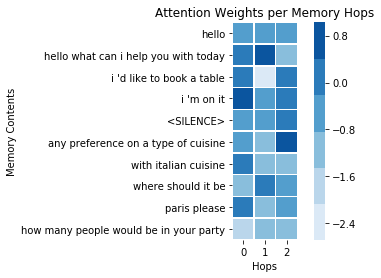

True label:  which price range are looking for
Prediction:  which price range are looking for

--------------------------------------------------



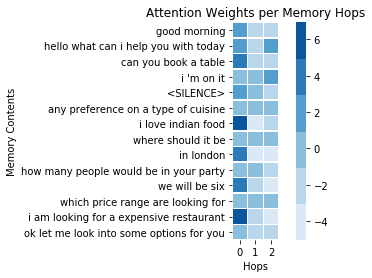

True label:  api_call indian london six expensive
Prediction:  api_call indian london six expensive

--------------------------------------------------



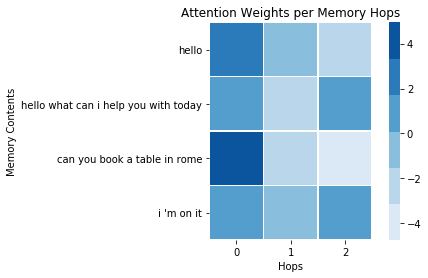

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



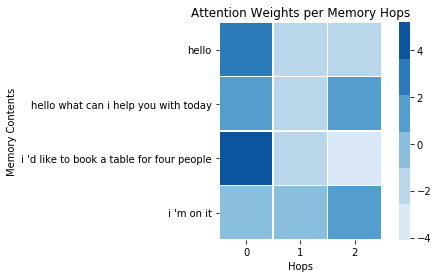

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



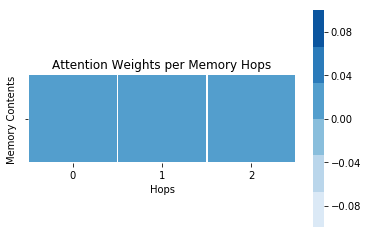

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



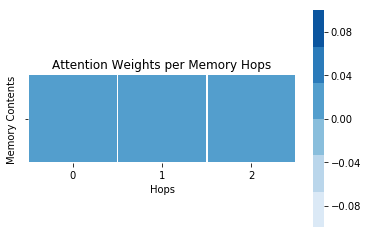

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



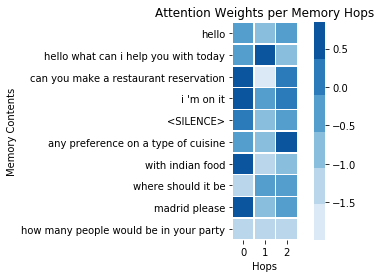

True label:  which price range are looking for
Prediction:  which price range are looking for

--------------------------------------------------



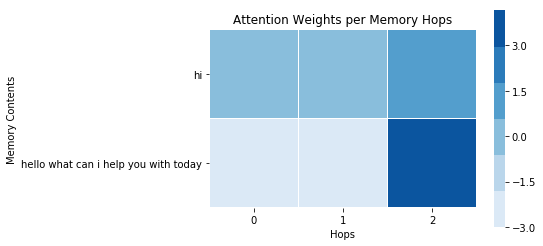

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



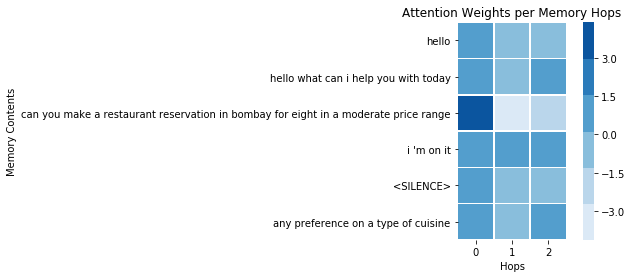

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



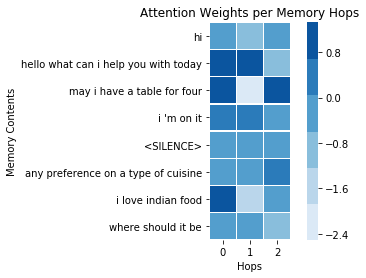

True label:  which price range are looking for
Prediction:  which price range are looking for

--------------------------------------------------



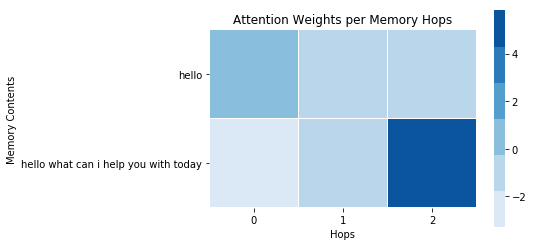

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



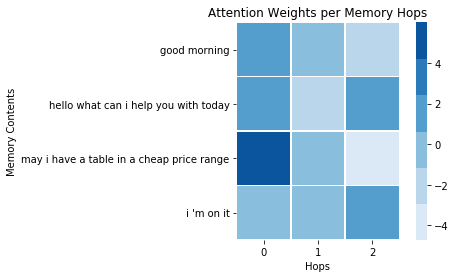

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



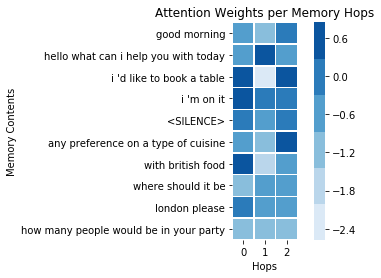

True label:  which price range are looking for
Prediction:  which price range are looking for

--------------------------------------------------



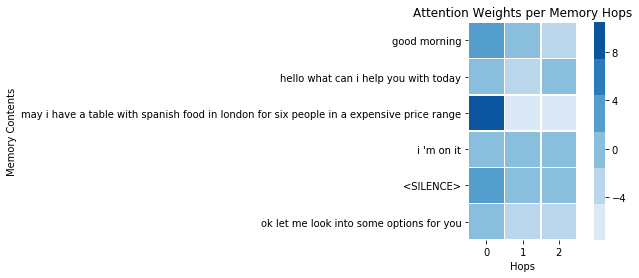

True label:  api_call spanish london six expensive
Prediction:  api_call spanish london six expensive

--------------------------------------------------



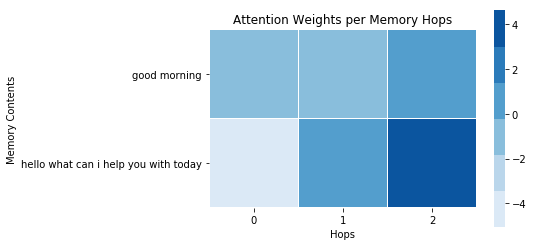

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



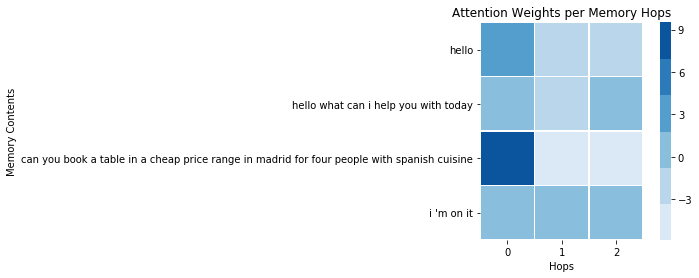

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



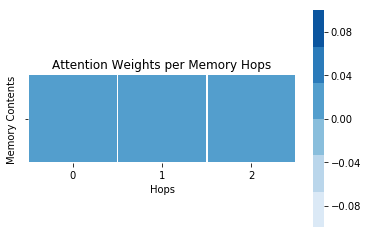

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



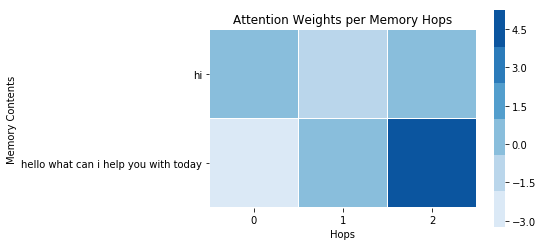

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



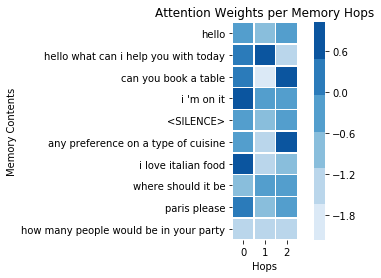

True label:  which price range are looking for
Prediction:  which price range are looking for

--------------------------------------------------



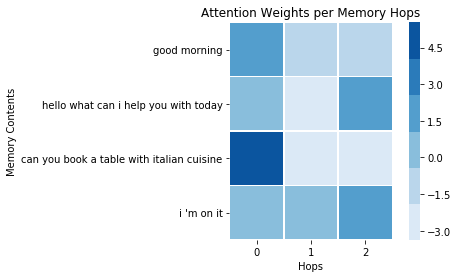

True label:  where should it be
Prediction:  where should it be

--------------------------------------------------



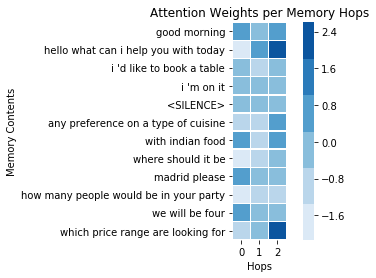

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



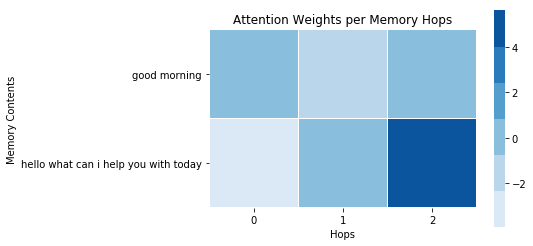

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



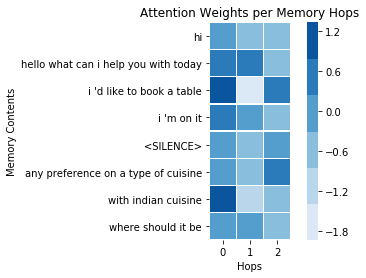

True label:  how many people would be in your party
Prediction:  how many people would be in your party

--------------------------------------------------



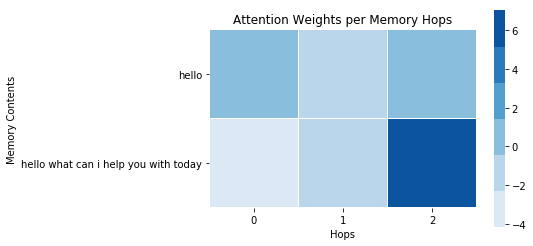

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



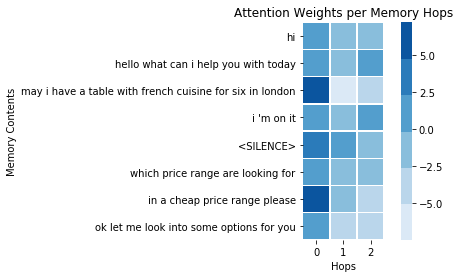

True label:  api_call french london six cheap
Prediction:  api_call french london six cheap

--------------------------------------------------



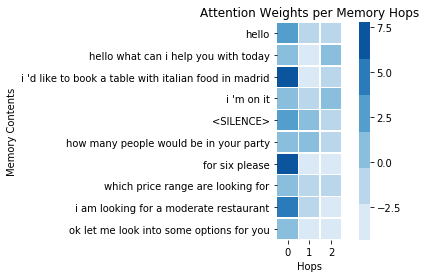

True label:  api_call italian madrid six moderate
Prediction:  api_call italian madrid six moderate

--------------------------------------------------



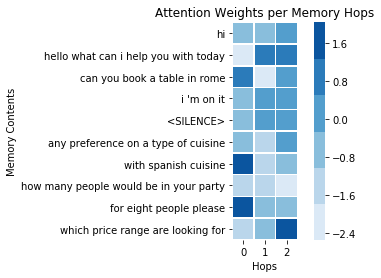

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



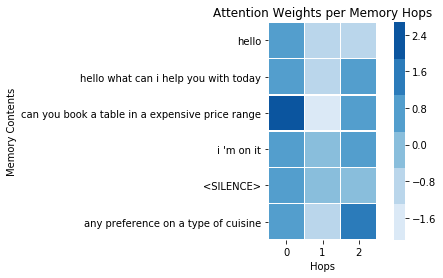

True label:  where should it be
Prediction:  where should it be

--------------------------------------------------



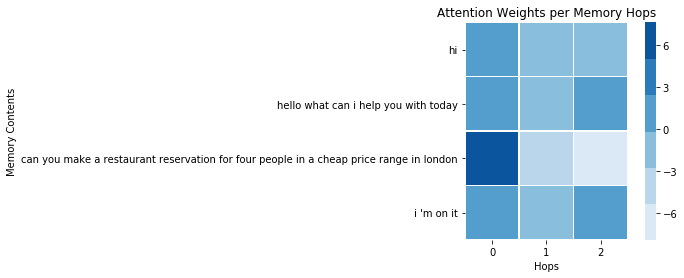

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



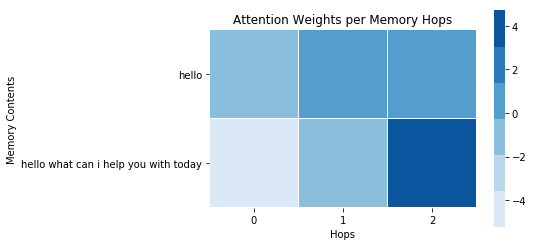

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



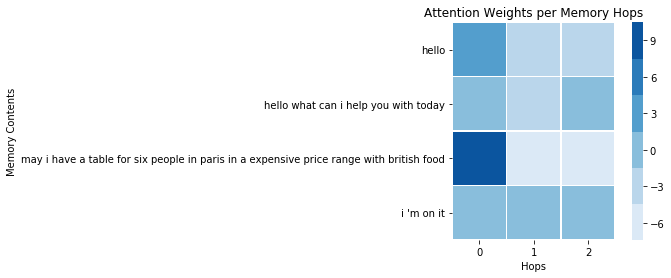

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



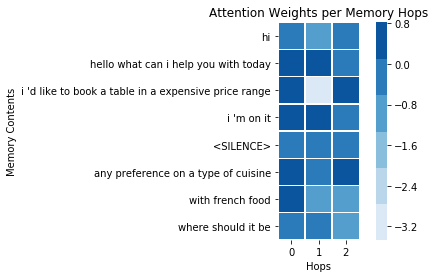

True label:  how many people would be in your party
Prediction:  how many people would be in your party

--------------------------------------------------



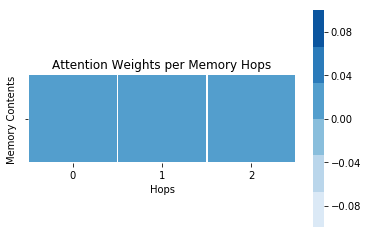

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



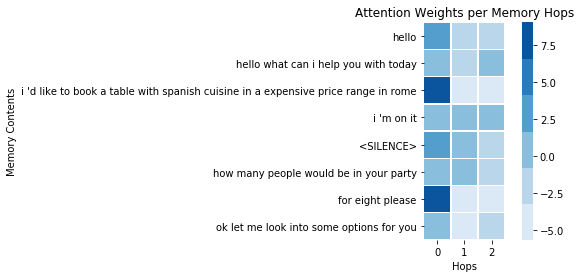

True label:  api_call spanish rome eight expensive
Prediction:  api_call spanish rome eight expensive

--------------------------------------------------



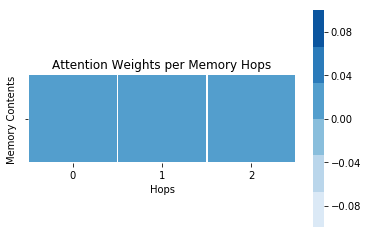

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



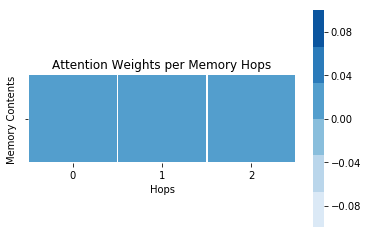

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



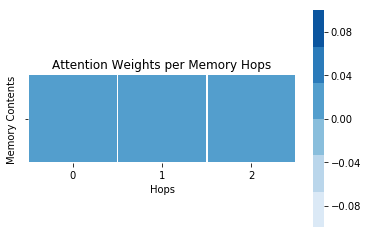

True label:  hello what can i help you with today
Prediction:  hello what can i help you with today

--------------------------------------------------



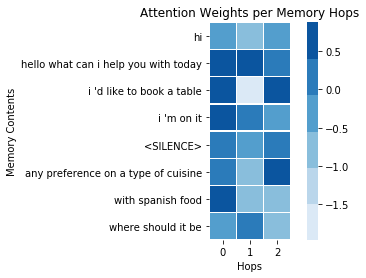

True label:  how many people would be in your party
Prediction:  how many people would be in your party

--------------------------------------------------



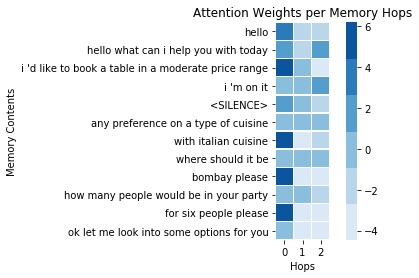

True label:  api_call italian bombay six moderate
Prediction:  api_call italian bombay six moderate

--------------------------------------------------



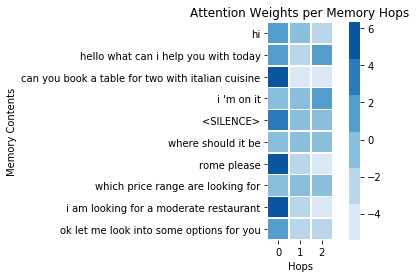

True label:  api_call italian rome two moderate
Prediction:  api_call italian rome two moderate

--------------------------------------------------



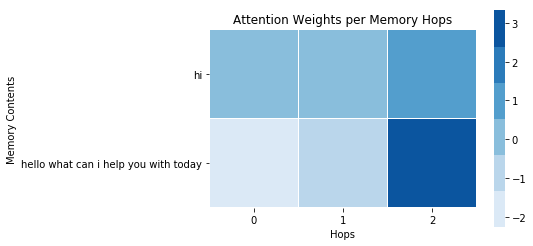

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



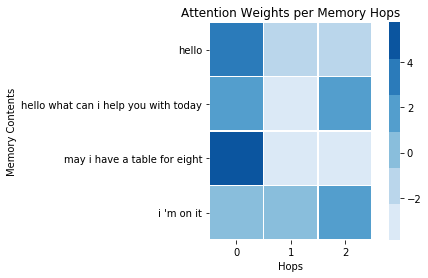

True label:  any preference on a type of cuisine
Prediction:  any preference on a type of cuisine

--------------------------------------------------



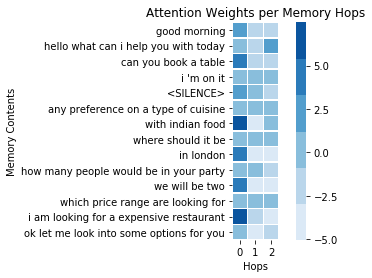

True label:  api_call indian london two expensive
Prediction:  api_call indian london two expensive

--------------------------------------------------



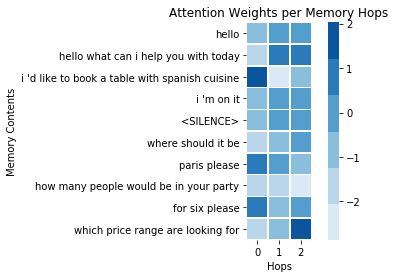

True label:  ok let me look into some options for you
Prediction:  ok let me look into some options for you

--------------------------------------------------



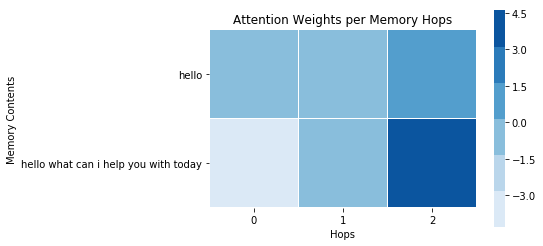

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



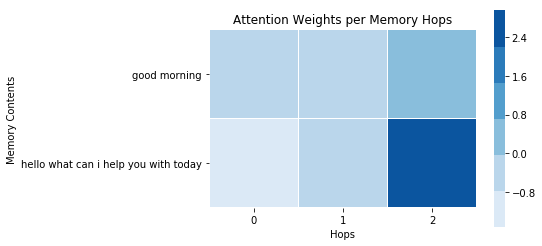

True label:  i'm on it
Prediction:  i'm on it

--------------------------------------------------



In [6]:
def visualize_attentions(model, dialog_vocab, candidate_vocab, memory, query, label=None):
    
    pred, attn = model(Variable(memory), Variable(query))
    
    attn = attn.squeeze(0).data.numpy()
    
    y_labels = []
    pad = dialog_vocab.word_to_index('<pad>')
    for row in memory.squeeze(0).numpy():
        row = row.tolist()
        end = len(row)
        if pad in row:
            end = row.index(pad)
        y_labels.append(vec2sent(dialog_vocab, row[2:end]))
    
    ax = plt.axes()
    ax.set_title('Attention Weights per Memory Hops')
    ax = sns.heatmap(attn, linewidths=.5, square=True, yticklabels=y_labels, ax=ax, cmap=sns.color_palette("Blues"))
    ax.set(xlabel='Hops', ylabel='Memory Contents')
    plt.show()
    
    if label:
        print('True label: ', candidate_vocab.index_to_word(label))
        print('Prediction: ', candidate_vocab.index_to_word(torch.max(pred.data, 1)[1][0]))



model_dir = '/home/barna/Projects/MemN2N/model_1519143627.2609842'
test_data_path = '/home/barna/Projects/MemN2N/data/dialog-bAbI-tasks/dialog-babi-task1-API-calls-dev.txt'
max_mem_size = 200

dialog_vocab = Vocab.load(os.path.join(model_dir, 'dialog_vocab'))
candidates_vocab = Vocab.load(os.path.join(model_dir, 'candidates_vocab'))

model = MemN2N.load(os.path.join(model_dir, 'model'))

test_data_reader = DialogReader(test_data_path, dialog_vocab, candidates_vocab, max_mem_size, 1, False, True, False)

for i, sample in enumerate(test_data_reader):
    
    memory, query, label = sample
    
    visualize_attentions(model, test_data_reader._dialog_vocab, test_data_reader._candidate_vocab, memory, query, label[0][0])
    
    print('\n--------------------------------------------------\n')
    
    # showing only 10 examples
    if i == 50:
        break